In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
import time

In [29]:
data = pd.read_csv("../dataset/dataset_3.csv", sep = ";").drop("Unnamed: 0", 1)
train = pd.read_csv("../dataset/train_3.csv", sep = ";").drop("Unnamed: 0", 1)
test = pd.read_csv("../dataset/test_3.csv", sep = ";").drop("Unnamed: 0", 1)
data.describe()

,TP_ESCOLA,TP_LINGUA,Q001,Q002,Q003,Q004,Q006,Q008,Q010,Q013,Q014,Q016,Q019,Q022,Q024,Q025,NIVEL_MT,Renda_per_capta,Pessoas_por_quarto
count,3.168898e+06,3.168898e+06,3.168898e+06,3.168898e+06,3.168898e+06,3.168898e+06,3.168898e+06,3.168898e+06,3.168898e+06,3.168898e+06,3.168898e+06,3.168898e+06,3.168898e+06,3.168898e+06,3.168898e+06,3.168898e+06,3.168898e+06,3.168898e+06,3.168898e+06
mean,4.491498e-01,5.271628e-01,3.439471e+00,4.073692e+00,2.296138e+00,2.226948e+00,3.496580e+00,1.369465e+00,5.234391e-01,3.874868e-01,5.953612e-01,4.919780e-01,1.309397e+00,2.399529e+00,6.882020e-01,7.773933e-01,2.500374e-01,-4.522173e-13,3.691336e-12
std,6.148688e-01,4.992617e-01,1.873869e+00,1.719509e+00,1.392760e+00,1.279828e+00,3.254036e+00,7.059705e-01,6.844870e-01,5.448613e-01,5.094890e-01,5.101993e-01,7.446282e-01,1.070197e+00,7.721223e-01,4.159964e-01,4.330344e-01,1.000000e+00,1.000000e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-6.665440e-01,-1.880658e+00
25%,0.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,-4.274470e-01,-5.410255e-01
50%,0.000000e+00,1.000000e+00,3.000000e+00,5.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-2.680491e-01,-2.061174e-01
75%,1.000000e+00,1.000000e+00,5.000000e+00,5.000000e+00,3.000000e+00,3.000000e+00,5.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-2.385733e-03,1.287908e-01
max,2.000000e+00,1.000000e+00,7.000000e+00,7.000000e+00,5.000000e+00,5.000000e+00,1.600000e+01,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,2.329107e+01,1.821383e+01


### Random Forest

### Testing hyperparameters with RandomGridSearch

In [ ]:
random_grid = {'n_estimators': [200, 300, 400],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)].append(None),
               'min_samples_split': [20, 40, 60, 80],
               'min_samples_leaf': [10, 20, 40, 60],
               'bootstrap': [True, False]}

rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, 
                               random_state=42, n_jobs = -1)
rf_random.fit(train.drop("NIVEL_MT", 1), train["NIVEL_MT"])
rf_random.best_params_

In [ ]:
rf = RandomForestClassifier(n_jobs = -1, n_estimators = 200, max_features = "sqrt", max_depth = 40, min_samples_split = 40,
                           min_samples_leaf = 20, bootstrap = True, class_weight = {0: 3, 1: 1}).fit(train.drop("NIVEL_MT", 1), train["NIVEL_MT"])
predictions = rf.predict(test.drop("NIVEL_MT", 1))
precision = precision_score(test["NIVEL_MT"] , predictions, average = "micro")
recall = recall_score(test["NIVEL_MT"] , predictions, average = "binary")
print("Precision: " + str(precision))
print("Recall: " + str(recall))
plot_confusion_matrix(rf, test.drop("NIVEL_MT", 1), test["NIVEL_MT"], cmap = "mako")

### XGBoost

#### Random Grid Search

In [ ]:
random_grid = {"learning_rate"    : [ 0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.40, 0.50, 0.70 ] ,
               "max_depth"        : [ 5, 10, 15, 20, 30, 40 ],
               "min_child_weight" : [ 1, 3, 5, 7 ],
               "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
               "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] }

rf = xgb.XGBClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, 
                               random_state=42, n_jobs = -1)
rf_random.fit(train.drop("NIVEL_MT", 1), train["NIVEL_MT"])
rf_random.best_params_

Precision: 0.6021479588079985
Recall: 0.730873897480978


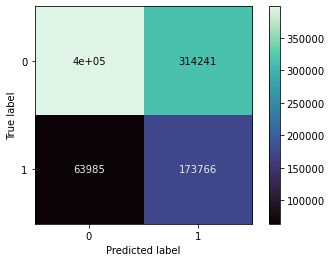

In [14]:
#model = rf_random.best_estimator_
model = xgb.XGBClassifier(n_jobs = -1, min_child_weight = 5, max_depth = 5, learning_rate = 0.3,
                         gamma = 0.2, colsample_bytree = 0.4).fit(train.drop(["NIVEL_MT"], 1), train["NIVEL_MT"])
predictions = model.predict(test.drop(["NIVEL_MT"], 1))
precision = precision_score(test["NIVEL_MT"] , predictions, average = "micro")
recall = recall_score(test["NIVEL_MT"] , predictions, average = "binary")
print("Precision: " + str(precision))
print("Recall: " + str(recall))
plot_confusion_matrix(model, test.drop(["NIVEL_MT"], 1), test["NIVEL_MT"], cmap = "mako")

Running time: 90.11709070205688


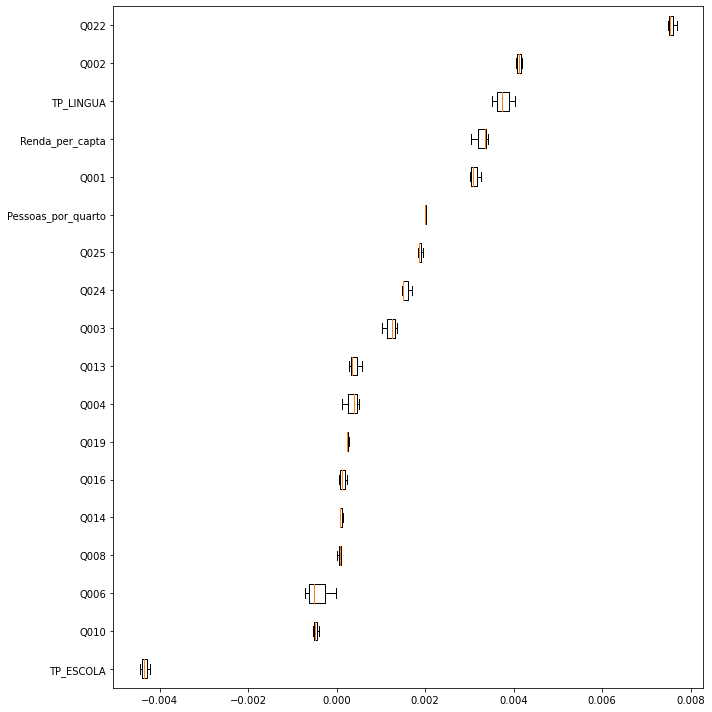

In [15]:
start = time.time()
r = permutation_importance(model, test.drop("NIVEL_MT",1), test["NIVEL_MT"], n_repeats = 3)
sorted_idx = r.importances_mean.argsort()
fig, ax = plt.subplots(figsize=(10,10))
ax.boxplot(r.importances[sorted_idx].T, vert=False, labels = train.drop("NIVEL_MT",1).columns[sorted_idx])
fig.tight_layout()
plt.savefig("../pictures/Matematica/Permutation_XGBoost.png")
end = time.time()

print("Running time: " + str(end-start))

In [30]:
data = data.drop(["TP_ESCOLA", "Q010", "Q006", "Q008", "Q014", "Q016", "Q019", "Q004", "Q013"], 1)
train = train.drop(["TP_ESCOLA", "Q010", "Q006", "Q008", "Q014", "Q016", "Q019", "Q004", "Q013"], 1)
test = test.drop(["TP_ESCOLA", "Q010", "Q006", "Q008","Q014", "Q016", "Q019", "Q004", "Q013"], 1)

Precision: 0.7534970073737469
Recall: 0.046346808215317704


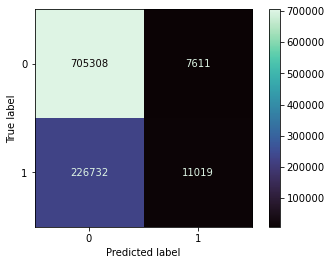

In [60]:
model = xgb.XGBClassifier(n_jobs = -1, min_child_weight = 5, max_depth = 30, learning_rate = 0.3,
                         gamma = 0.2, colsample_bytree = 0.45).fit(data.drop("NIVEL_MT", 1), data["NIVEL_MT"])
predictions = model.predict(test.drop(["NIVEL_MT"], 1))
precision = precision_score(test["NIVEL_MT"] , predictions, average = "micro")
recall = recall_score(test["NIVEL_MT"] , predictions, average = "binary")
print("Precision: " + str(precision))
print("Recall: " + str(recall))
plot_confusion_matrix(model, test.drop(["NIVEL_MT"], 1), test["NIVEL_MT"], cmap = "mako")

### Naive Bayes

Precision: 0.5769141763177549
Recall: 0.743323897691282


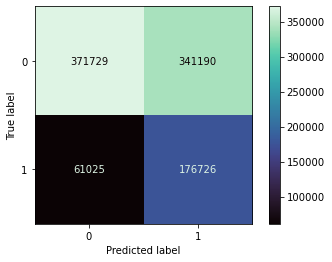

In [3]:
model = GaussianNB(priors = [0.75, 0.25]).fit(train.drop("NIVEL_MT", 1), train["NIVEL_MT"])
predictions = model.predict(test.drop("NIVEL_MT", 1))
precision = precision_score(test["NIVEL_MT"] , predictions, average = "micro")
recall = recall_score(test["NIVEL_MT"] , predictions, average = "binary")
print("Precision: " + str(precision))
print("Recall: " + str(recall))
plot_confusion_matrix(model, test.drop("NIVEL_MT", 1), test["NIVEL_MT"], cmap = "mako")

### SVM

In [ ]:
model = svm.SVC().fit(train.drop("NIVEL_MT", 1), train["NIVEL_MT"])
predictions = model.predict(test.drop("NIVEL_MT", 1))
precision = precision_score(test["NIVEL_MT"] , predictions, average = "binary")
print("Precision: " + str(precision))
plot_confusion_matrix(model, test.drop("NIVEL_MT", 1), test["NIVEL_MT"], cmap = "mako")